# Ejercicios - Juan José Reyes Celis 

### Import packages

In [3]:
import numpy as np
import pandas as  pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
from scipy.stats import kruskal
from scipy import stats

### Week one: print "Hello world!", basic operations and function

In [4]:
# Week one: Print "Hello World" and basic operations
print("Hello, World!")
# Basic arithmetic operations
# Define two variables
a = 37323
b = 39373
# Adittion
print(a+b)
# Substraction
print(b-a)
# Multiplication
print(a*b)
# Division
print(a/b)
# Absolute value of a number
def valor_absoluto(x):
    return x if x >= 0 else -x 
print(valor_absoluto(-5))

Hello, World!
76696
2050
1469518479
0.9479338633073426
5


### Week two: Missing values, descripyive statistics plots, normality test and non-parametric tests

### 1. Missing values

In [4]:
# Import dataset 
df = pd.read_csv("Terminos_lagoon_TA_DIC_2023_RawData.csv")
print(df.head(5))
print(df.tail(5))
print(df.info())
# New column "TA_DIC_ratio"
df["TA_DIC_ratio"] = df["ta_micromol_kg"]/df["dic_micromol_kg"]
print(df.head(6))
# Mean of "TA_DIC_ratio" per season 
print(df["season"].head())
season_mean = df.groupby("season")["TA_DIC_ratio"].mean()
print(season_mean)
# Mean of "TA_DIC_ratio"per area
area_mean = df.groupby("area")["TA_DIC_ratio"].mean()
print(area_mean)
# Std of "TA_DIC_ratio" per season and area
season_std = df.groupby("season")["TA_DIC_ratio"].std()
print(season_std)
area_std = df.groupby("area")["TA_DIC_ratio"].std()
print(area_std)
# Create dataframe with objects
TA_DIC_Season_Areas = pd.DataFrame({
    "season_mean": season_mean,
    "area_mean": area_mean, 
    "season_std": season_std,
    "area_std": area_std,
})
print(TA_DIC_Season_Areas)
# Crearte excel with results 
TA_DIC_Season_Areas.to_excel("TA_DIC_Season_Area.xlsx", sheet_name="Hoja 1", index=True)



   sample      date     estuary   area station layer_depth season  \
0  CDL01S  5/3/2020  Candelaria  River   CDL01     Surface    Dry   
1  CDL01F  5/3/2020  Candelaria  River   CDL01      Bottom    Dry   
2  CDL02S  5/3/2020  Candelaria  River   CDL02     Surface    Dry   
3  CDL02F  5/3/2020  Candelaria  River   CDL02      Bottom    Dry   
4  CDL03S  5/3/2020  Candelaria  River   CDL03     Surface    Dry   

   chlorophy_microg_l  cond_microsiemens_cm  depth_m  ...  do_mg_l  sal_psu  \
0                0.36                7015.4    0.464  ...     7.12     3.56   
1                4.19               29886.1    7.792  ...     4.90    16.97   
2                0.92               16691.1    0.453  ...     6.99     8.94   
3                2.23               24847.4    1.261  ...     6.52    13.87   
4                0.58               46341.6    0.465  ...     6.24    28.06   

   sp_cond_microsiemens_cm  turbidity_fnu  temp_c  latitude  longitude  \
0                   6547.7          

### 2. Descriptive plots 

   sample      date     estuary   area station layer_depth season  \
0  CDL01S  5/3/2020  Candelaria  River   CDL01     Surface    Dry   
1  CDL01F  5/3/2020  Candelaria  River   CDL01      Bottom    Dry   
2  CDL02S  5/3/2020  Candelaria  River   CDL02     Surface    Dry   
3  CDL02F  5/3/2020  Candelaria  River   CDL02      Bottom    Dry   

   chlorophy_microg_l  cond_microsiemens_cm  depth_m  ...  do_mg_l  sal_psu  \
0                0.36                7015.4    0.464  ...     7.12     3.56   
1                4.19               29886.1    7.792  ...     4.90    16.97   
2                0.92               16691.1    0.453  ...     6.99     8.94   
3                2.23               24847.4    1.261  ...     6.52    13.87   

   sp_cond_microsiemens_cm  turbidity_fnu  temp_c  latitude  longitude  \
0                   6547.7           1.47  28.740  18.55736  -91.25012   
1                  27751.2          95.33  29.028  18.55722  -91.24990   
2                  15429.1          

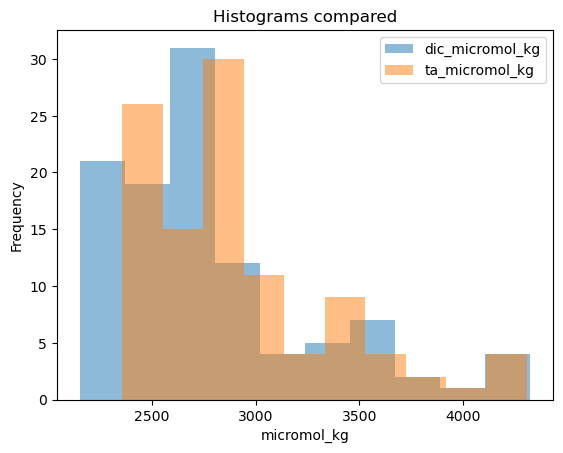

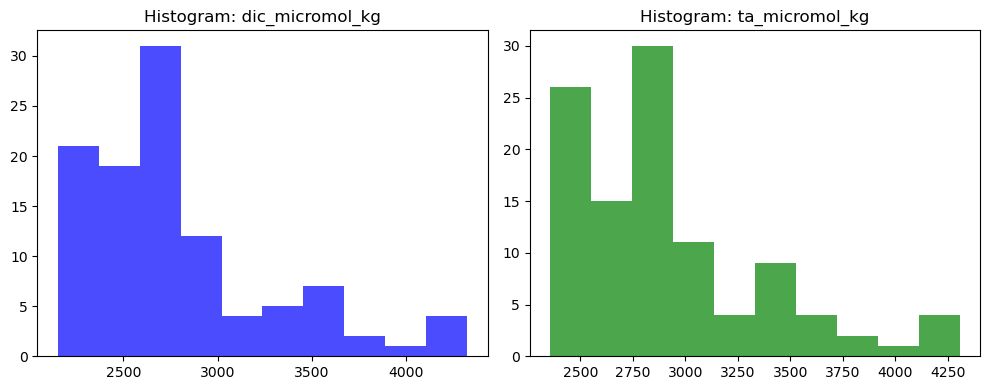

In [4]:
# Import dataset 
df = pd.read_csv("Terminos_lagoon_TA_DIC_2023_RawData.csv")
print(df.head(4))
# Plot histogram of DIC and TAC 
df["dic_micromol_kg"].plot.hist(alpha=0.5, bins=10)
df["ta_micromol_kg"].plot.hist(alpha=0.5, bins=10)
plt.xlabel("micromol_kg")
plt.ylabel("Frequency")
plt.title("Histograms compared")
plt.legend()
plt.show()
# Individual plot of DIC and TAC 
fig, axes = plt.subplots(1, 2, figsize=(10,4))

axes[0].hist(df["dic_micromol_kg"], bins=10, color='blue', alpha=0.7)
axes[0].set_title("Histogram: dic_micromol_kg")

axes[1].hist(df["ta_micromol_kg"], bins=10, color='green', alpha=0.7)
axes[1].set_title("Histogram: ta_micromol_kg")

plt.tight_layout()
plt.show()


### 3. My own data plots 

                Site      Subasin    Quality  \
0        Agua dulce   San Rafael   Reference   
1  Canal San Rafael   San Rafael   Reference   
2  Cascada Compañía   San Rafael   Reference   
3      El Llano alto   Cuautitlán  Reference   

   total_Abundance_Ajusted_elemean (+)  \
0                             0.385410   
1                             0.733733   
2                             0.672961   
3                             0.370433   

   crwalers_richness_Ajusted_slopemean (variable)  %_temporary_attached (+)  \
0                                        0.615321                  0.711254   
1                                        0.616913                  0.710143   
2                                        0.795694                  0.494193   
3                                        0.746479                  0.922095   

   %_scrapers_Ajusted_tempmean (+)  Richness_Diptera (-)  Final IBI class  
0                         0.666344              0.634817   0.602629  GOOD  


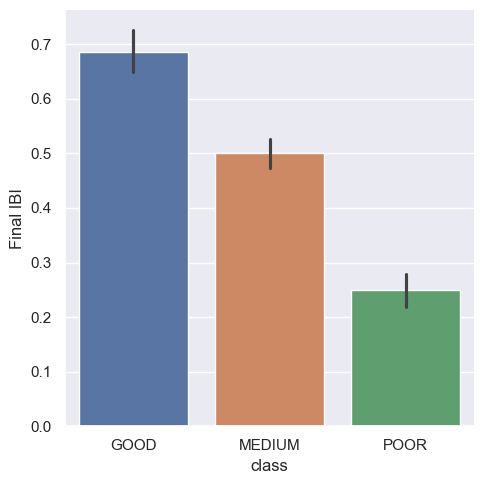

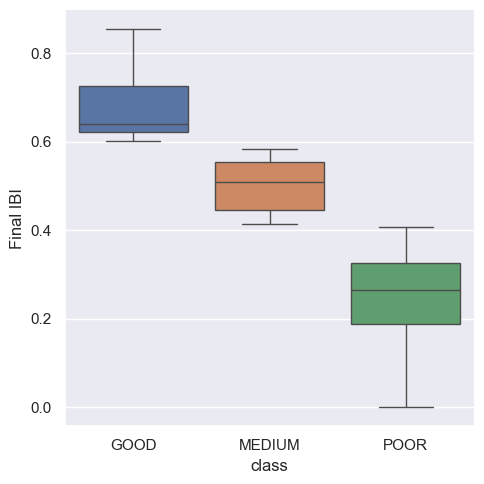

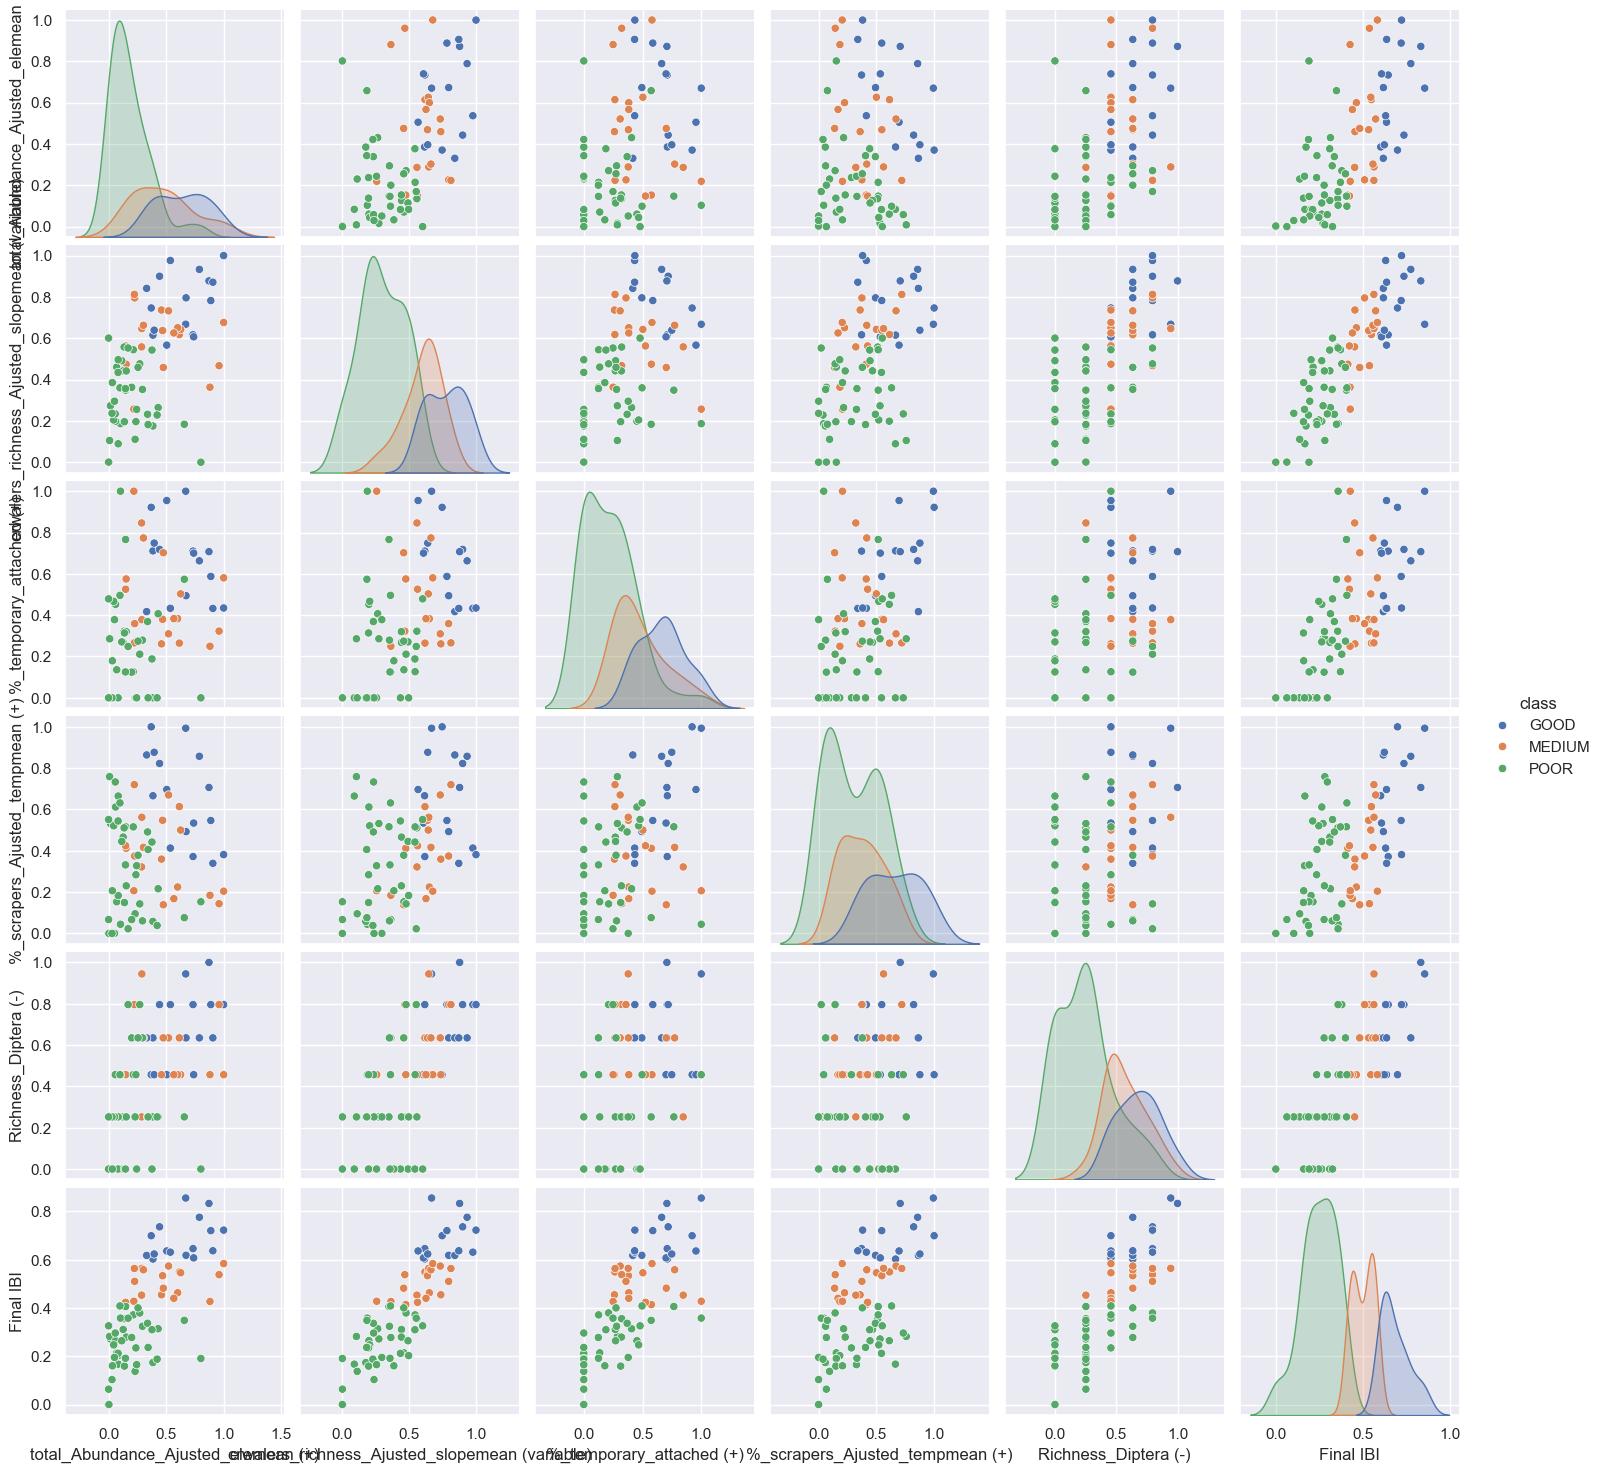

In [25]:
# My dataframe 
df_mine = pd.read_csv("IBI_FINAL_RDA.csv")
print(df_mine.head(4))
sns.set_theme()
sns.catplot(data=df_mine, kind="bar", x="class", y="Final IBI", hue="class")
sns.catplot(data=df_mine, kind="box", x="class", y="Final IBI", hue="class")
sns.pairplot(data=df_mine, hue="class")

### 4. Normality test
**When is it appropriate to use the Kolmogorov-Smirnov test instead of the Shapiro-Wilk test?**
###  En general se recomienda como primera opción la prueba de Shapiro-Wilk ya que detecta mejor las deviaciónes en la distribución normal y funciona con muestras pequeñas. Por lo cual en este caso es la mejor opción. Sin embrago, Kolmogorov-Smirnov se recomienda con n > 2000. 

In [11]:
df.info()
# 106 entries better to do shapiro-wilk
#Shapiro-wilk function
def shapiro_wilk (df, columns, alpha=0.05): 
    resultados = []
    for col in column: 
        data = df[col].dropna()
        stat, p = shapiro(data)
        interpretacion = "Normal" if p > alpha else "No normal"
        resultados.append(
            {"Columna": col, 
             "Estadistico W": stat, 
             "Valor p": p, 
             "Interpretacion": interpretacion,
        })
    return pd.DataFrame(resultados)    

# Function use 
column = ["sal_psu", "dic_micromol_kg"]
shapiro_wilk(df, column)
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sample                   106 non-null    object 
 1   date                     106 non-null    object 
 2   estuary                  106 non-null    object 
 3   area                     106 non-null    object 
 4   station                  106 non-null    object 
 5   layer_depth              106 non-null    object 
 6   season                   106 non-null    object 
 7   chlorophy_microg_l       106 non-null    float64
 8   cond_microsiemens_cm     106 non-null    float64
 9   depth_m                  106 non-null    float64
 10  do_percent_sat           106 non-null    float64
 11  do_mg_l                  106 non-null    float64
 12  sal_psu                  106 non-null    float64
 13  sp_cond_microsiemens_cm  106 non-null    float64
 14  turbidity_fnu            1

,Columna,Estadistico W,Valor p,Interpretacion
0,sal_psu,0.886664,1.838850e-07,No normal
1,dic_micromol_kg,0.859974,1.383694e-08,No normal


### 5. Non parametric Mann-Whitney U test


In [12]:
df.info()
# Mann-Whiteny function 
def mann_whitney_test (variable_1, variable_2, alpha = 0.05): 
    """
    Performs the Mann-Whitney U test and prints U statistic, p-value, and result.
    """
    result = mannwhitneyu(variable_1,  variable_2, alternative="two-sided")
    print(f"U statistics = {result.statistic}")
    print(f"p-value = {result.pvalue}")
    
    if result.pvalue < alpha:
        print("The difference is statistically significant.")
    else: 
        print("The difference is not statistically significant.")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sample                   106 non-null    object 
 1   date                     106 non-null    object 
 2   estuary                  106 non-null    object 
 3   area                     106 non-null    object 
 4   station                  106 non-null    object 
 5   layer_depth              106 non-null    object 
 6   season                   106 non-null    object 
 7   chlorophy_microg_l       106 non-null    float64
 8   cond_microsiemens_cm     106 non-null    float64
 9   depth_m                  106 non-null    float64
 10  do_percent_sat           106 non-null    float64
 11  do_mg_l                  106 non-null    float64
 12  sal_psu                  106 non-null    float64
 13  sp_cond_microsiemens_cm  106 non-null    float64
 14  turbidity_fnu            1

### 6. Function use and plots

Mann-Whitney U test for DIC
U statistics = 1942.5
p-value = 1.1746695070093673e-06
The difference is statistically significant.
Mann-Whitney U test for Temperature
U statistics = 551.0
p-value = 5.317160670684041e-06
The difference is statistically significant.


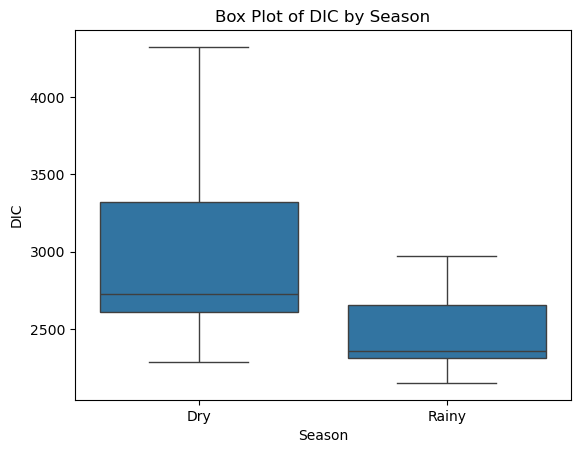

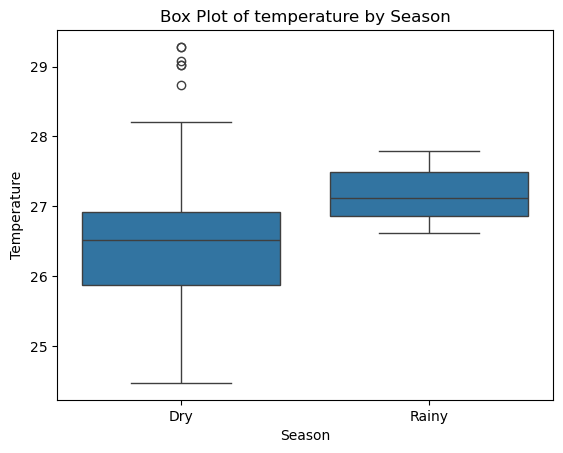

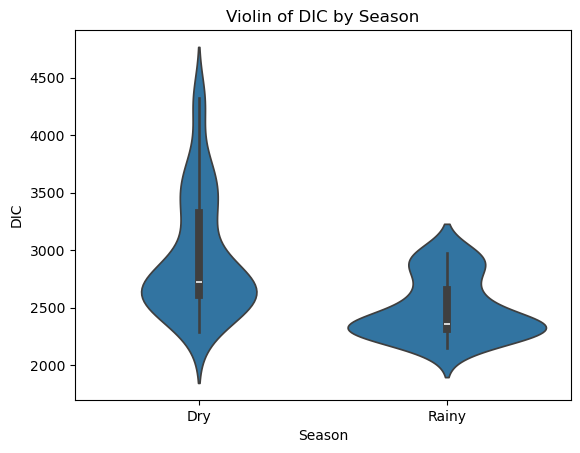

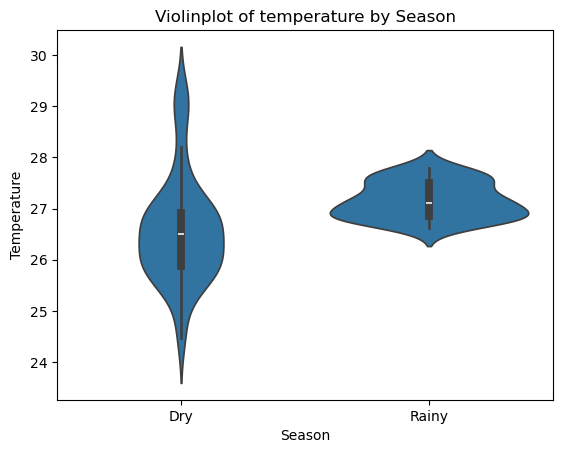

In [37]:
# Filter DIC and Temperature data by season
dic_data_dry = df.loc[df["season"] == "Dry", "dic_micromol_kg"]
dic_data_rainy = df.loc[df["season"] == "Rainy", "dic_micromol_kg"]
tem_data_dry = df.loc[df["season"] == "Dry", "temp_c"]
tem_data_rainy = df.loc[df["season"] == "Rainy", "temp_c"]

# Perform Mann-Whitney
print("Mann-Whitney U test for DIC")
mann_whitney_test(dic_data_dry, dic_data_rainy)
print("Mann-Whitney U test for Temperature")
mann_whitney_test(tem_data_dry, tem_data_rainy)

# Create box-plot DIC
sns.boxplot(x="season", y="dic_micromol_kg", data=df)
# Add labels and title
plt.xlabel('Season')
plt.ylabel('DIC')
plt.title('Box Plot of DIC by Season')

# Show the plot
plt.show()

# Create box-plot temperature
sns.boxplot(x="season", y="temp_c", data=df)

# Add labels and title
plt.xlabel('Season')
plt.ylabel('Temperature')
plt.title('Box Plot of temperature by Season')

# Show the plot
plt.show()

# Create a violin plot for DIC
sns.violinplot(x="season", y="dic_micromol_kg", data=df)
# Add labels and title
plt.xlabel('Season')
plt.ylabel('DIC')
plt.title('Violin of DIC by Season')

# Show the plot
plt.show()

# Create a violin plot for Temperature
sns.violinplot(x="season", y="temp_c", data=df)

# Add labels and title
plt.xlabel('Season')
plt.ylabel('Temperature')
plt.title('Violinplot of temperature by Season')

# Show the plot
plt.show()

### 7. Nonparametric Kruskall-Wallis function

In [23]:
def kruskal_wallis_test (*groups, alpha = 0.05):
    """
    Performs the Kruskal-Wallis H-test for independent samples.
    Accepts multiple groups as arguments.
    Prints the H statistic, p-value, and interpretation.
    """
    result = kruskal(*groups)
    print(f"H statistic {result.statistic}")
    print(f"p value = {result.pvalue}")
    if result.pvalue < alpha:
        print("The difference between groups is statistically significant.")
    else: 
        print("The difference between groups is not statistically significant.")

        

### 8. Function use and plots 

['River' 'Plume' 'Coast']
DIC Kruskal Wallis test by area
H statistic 55.889669058187486
p value = 7.306553461098262e-13
The difference between groups is statistically significant.
Temperature Kruskal Wallis test by area
H statistic 7.6996429549091365
p value = 0.021283535690208223
The difference between groups is statistically significant.


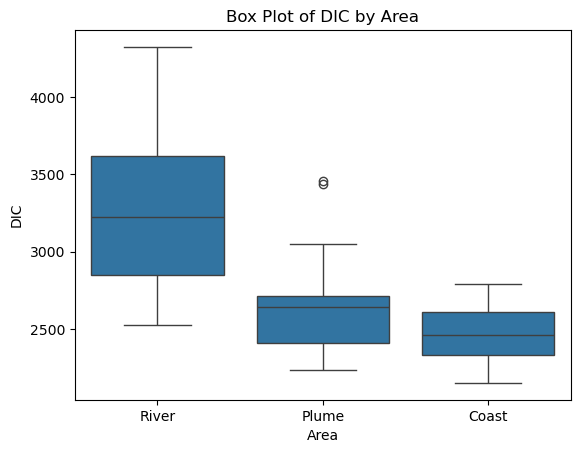

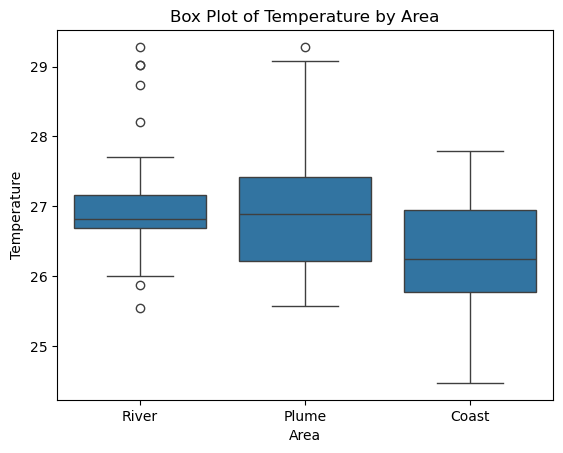

In [39]:
print(df["area"].unique())
# Filtering data 
dic_data_river = df.loc[df["area"] == "River", "dic_micromol_kg"]
dic_data_plume = df.loc[df["area"] == "Plume", "dic_micromol_kg"]
dic_data_coast = df.loc[df["area"] == "Coast", "dic_micromol_kg"]
tem_data_river = df.loc[df["area"] == "River", "temp_c"]
tem_data_plume = df.loc[df["area"] == "Plume", "temp_c"]
tem_data_coast = df.loc[df["area"] == "Coast", "temp_c"]

# Kruskall Wallis test 
print("DIC Kruskal Wallis test by area")
kruskal_wallis_test(dic_data_river, dic_data_plume, dic_data_coast)
print("Temperature Kruskal Wallis test by area")
kruskal_wallis_test(tem_data_river, tem_data_plume, tem_data_coast)

# DIC Box-plots
sns.boxplot(x="area", y="dic_micromol_kg", data=df)
# Add labels and title
plt.xlabel('Area')
plt.ylabel('DIC')
plt.title('Box Plot of DIC by Area')
# Show the plot
plt.show()

# Temperature Box-plots
sns.boxplot(x="area", y="temp_c", data=df)
# Add labels and title
plt.xlabel('Area')
plt.ylabel('Temperature')
plt.title('Box Plot of Temperature by Area')
# Show the plot
plt.show()



### 9. Linear regression 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sample                   106 non-null    object 
 1   date                     106 non-null    object 
 2   estuary                  106 non-null    object 
 3   area                     106 non-null    object 
 4   station                  106 non-null    object 
 5   layer_depth              106 non-null    object 
 6   season                   106 non-null    object 
 7   chlorophy_microg_l       106 non-null    float64
 8   cond_microsiemens_cm     106 non-null    float64
 9   depth_m                  106 non-null    float64
 10  do_percent_sat           106 non-null    float64
 11  do_mg_l                  106 non-null    float64
 12  sal_psu                  106 non-null    float64
 13  sp_cond_microsiemens_cm  106 non-null    float64
 14  turbidity_fnu            1

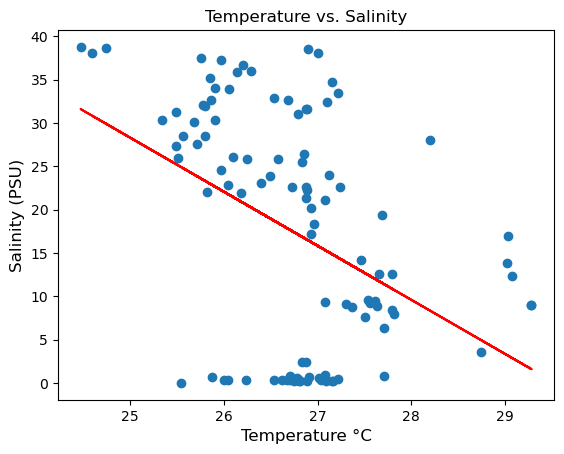

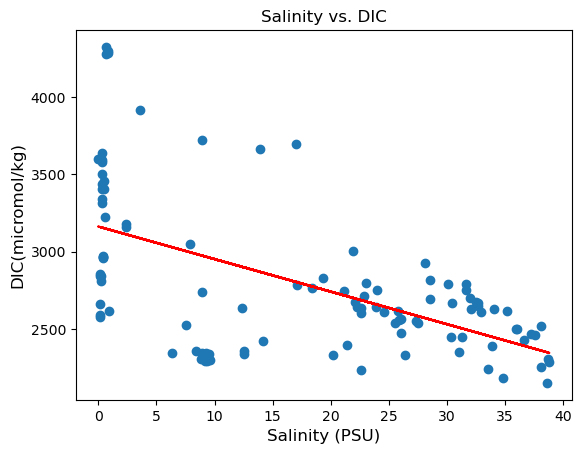

Statistics of the lineal regression: Temperature vs. Salinity
r-squared: 0.17749929096684752
p_value: 6.879907520531154e-06
slope: -6.237079764689512
intercept: 184.22846870564854
Statistics of the lineal regression: Salinity vs. DIC
r-squared: 0.32710473310227767
p_value: 1.51441040237653e-10
slope: -21.053197646779633
intercept: 3162.874756459312


In [5]:
df.info()
# Get variables for the regression
x1 = df["temp_c"]
y1 = df["sal_psu"]
x2 = df["sal_psu"]
y2 = df["dic_micromol_kg"]

# Create plot Temperature vs. Salinity
plt.scatter(x1,y1, label="Temperature vs. Salinity")
# Add labels and title
plt.xlabel('Temperature °C', fontsize = 12)
plt.ylabel('Salinity (PSU)', fontsize = 12)
plt.title("Temperature vs. Salinity")

# Calculate the linear regression line
slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(x1, y1)

# Plot linear regression 
plt.plot(x1, intercept1 + slope1*x1, 'r', label='fitted line')

plt.show()

# Create plot Salinity vs. DIC
plt.scatter(x2,y2, label="Salinity vs. DIC")
# Add labels and title
plt.xlabel('Salinity (PSU)', fontsize = 12)
plt.ylabel('DIC(micromol/kg)', fontsize = 12)
plt.title("Salinity vs. DIC")

# Calculate the linear regression line
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(x2, y2)

# Plot linear regression 
plt.plot(x2, intercept2 + slope2*x2, 'r', label='fitted line')

plt.show()

# Print statistics 
print("Statistics of the lineal regression: Temperature vs. Salinity")
print("r-squared:", r_value1**2)
print("p_value:", p_value1)
print("slope:", slope1)
print("intercept:", intercept1)
print("Statistics of the lineal regression: Salinity vs. DIC")
print("r-squared:", r_value2**2)
print("p_value:", p_value2)
print("slope:", slope2)
print("intercept:", intercept2)